In [25]:
import timm
import os
import h5py
import numpy as np
import torch
from sklearn.model_selection import KFold
import warnings
import scipy
from scipy import stats 
from scipy.stats import shapiro
warnings.filterwarnings('ignore')
import os
import matplotlib.ticker as mtick
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [19]:
# common link and unique link
CLS2IDX =  ['emotion','gambling','language','motor','relational','social','wm']
percent = 20
allregions = 219
cor_regions = 200
half_cortical = 100
subcortical_regions = 19
all_lobe = []
# data = os.listdir('/media/D/zephyr/functional_connectivity/CHCP/aparc/percent_0.15/Emotion')
# data = [int(i[0:4]) for i in data]
# data = np.array(sorted(data))
for random_state_num in range(1998,2004):
    data = np.arange(1,1008)
    five_fold = []
    kf=KFold(n_splits=5,shuffle=True,random_state=random_state_num)
    for k,(train_index, test_index) in list(enumerate(kf.split(data))):
        all_task_all_sub = []
        for cls_num in range(7):
            one_task_all_sub = np.zeros(int(allregions*(allregions-1)*0.5))
            for sub in data[test_index]:
                sub_edge = np.load('/media/D/zephyr/vit_155_155/other_map/aparc_vis/{}/{}/Schaefer_{}_edge_{}_7class_original.npy'
                .format(percent,CLS2IDX[cls_num],sub,random_state_num))
                sub_edge = (sub_edge+np.transpose(sub_edge))*0.5
                sub_edge = sub_edge[np.tril_indices_from(sub_edge,-1)]
                sub_edge = (sub_edge-sub_edge.min())/(sub_edge.max()-sub_edge.min())
                one_task_all_sub = sub_edge + one_task_all_sub
            all_task_all_sub.append(one_task_all_sub)
        five_fold.append(all_task_all_sub)
    all_lobe.append(five_fold)


In [23]:
average_value_conn = np.mean(np.array(all_lobe).transpose(2,3,0,1).reshape(7,23871,-1),2)
cor_regions = 100
comm = np.argsort(-average_value_conn[0])[0:238]
for i in range(7):
    comm = [k for k in np.argsort(-average_value_conn[i])[0:238] if k in comm]
x_ax_all,y_ax_all = [],[]
for conn in comm:
    x_axix = np.tril_indices_from(np.zeros((allregions,allregions)),-1)[0][conn]
    y_axix = np.tril_indices_from(np.zeros((allregions,allregions)),-1)[1][conn]
    x_ax_all.append(x_axix)
    y_ax_all.append(y_axix)
type_conn = []
for num_conn in np.arange(0,len(x_ax_all)):
    if x_ax_all[num_conn] <= (cor_regions*2-1) and x_ax_all[num_conn]%2 == 0:#sulci
        if y_ax_all[num_conn] <= (cor_regions*2-1) and y_ax_all[num_conn]%2 == 0:#sulci
            type_conn.append(2)
        elif y_ax_all[num_conn] <= (cor_regions*2-1) and y_ax_all[num_conn]%2 == 1:#gyri
            type_conn.append(1)
        else :
            type_conn.append(4)
    elif x_ax_all[num_conn] <= (cor_regions*2-1) and x_ax_all[num_conn]%2 == 1:#gyri
        if y_ax_all[num_conn] <= (cor_regions*2-1) and y_ax_all[num_conn]%2 == 0:#sulci
            type_conn.append(1)
        elif y_ax_all[num_conn] <= (cor_regions*2-1) and y_ax_all[num_conn]%2 == 1:#gyri
            type_conn.append(3)
        else:
            type_conn.append(5)
    else  :#sub
        if y_ax_all[num_conn] <= (cor_regions*2-1) and y_ax_all[num_conn]%2 == 0:#sulci
            type_conn.append(4)
        elif y_ax_all[num_conn] <= (cor_regions*2-1) and y_ax_all[num_conn]%2 == 1:#gyri
            type_conn.append(5)
        else:
            type_conn.append(6)
column = ['0']
df = pd.DataFrame(columns=column,data=np.array(x_ax_all))
df.insert(loc=1, column='1', value=np.array(y_ax_all))
df.insert(loc=2, column='2', value=np.array(type_conn))
df.to_excel("/media/D/zephyr/vit_155_155/picture/conn/hcp_top1_common.xlsx",index = False)#save common link

In [24]:
for task in range(7):
    unique = np.argsort(-average_value_conn[task])[0:238]
    x_ax_all,y_ax_all = [],[]
    for conn in unique:
        x_axix = np.tril_indices_from(np.zeros((allregions,allregions)),-1)[0][conn]
        y_axix = np.tril_indices_from(np.zeros((allregions,allregions)),-1)[1][conn]
        x_ax_all.append(x_axix)
        y_ax_all.append(y_axix)
    type_conn = []
    for num_conn in np.arange(0,len(x_ax_all)):
        if x_ax_all[num_conn] <= (cor_regions*2-1) and x_ax_all[num_conn]%2 == 0:#sulci
            if y_ax_all[num_conn] <= (cor_regions*2-1) and y_ax_all[num_conn]%2 == 0:#sulci
                type_conn.append(2)
            elif y_ax_all[num_conn] <= (cor_regions*2-1) and y_ax_all[num_conn]%2 == 1:#gyri
                type_conn.append(1)
            else :
                type_conn.append(4)
        elif x_ax_all[num_conn] <= (cor_regions*2-1) and x_ax_all[num_conn]%2 == 1:#gyri
            if y_ax_all[num_conn] <= (cor_regions*2-1) and y_ax_all[num_conn]%2 == 0:#sulci
                type_conn.append(1)
            elif y_ax_all[num_conn] <= (cor_regions*2-1) and y_ax_all[num_conn]%2 == 1:#gyri
                type_conn.append(3)
            else:
                type_conn.append(5)
        else  :#sub
            if y_ax_all[num_conn] <= (cor_regions*2-1) and y_ax_all[num_conn]%2 == 0:#sulci
                type_conn.append(4)
            elif y_ax_all[num_conn] <= (cor_regions*2-1) and y_ax_all[num_conn]%2 == 1:#gyri
                type_conn.append(5)
            else:
                type_conn.append(6)
    column = ['0']
    df = pd.DataFrame(columns=column,data=np.array(x_ax_all))
    df.insert(loc=1, column='1', value=np.array(y_ax_all))
    df.insert(loc=2, column='2', value=np.array(type_conn))
    df.to_excel("/media/D/zephyr/vit_155_155/picture/conn/hcp_{}_top1.xlsx".format(CLS2IDX[task]),index = False)#save unique link

In [ ]:
# Consistency of data from top 0.002 links to 0.202 links
CLS2IDX =  ['emotion','gambling','language','motor','relational','social','wm']
percent = 20
allregions = 219
cortical_regions = 200
half_cortical = 100
subcortical_regions = 19
all_lobe = []
for random_state_num in range(1998,2004):
    data = np.arange(1,1008)
    five_fold = []
    kf=KFold(n_splits=5,shuffle=True,random_state=random_state_num)
    for k,(train_index, test_index) in list(enumerate(kf.split(data))):
        all_task_all_sub = []
        for cls_num in range(7):
            one_task_all_sub = np.zeros(int(allregions*(allregions-1)*0.5))
            for sub in data[test_index]:
                sub_edge = np.load('/media/D/zephyr/vit_155_155/other_map/aparc_chcp_vis/{}/{}/Schaefer_{}_edge_{}_7class_original.npy'
                .format(percent,CLS2IDX[cls_num],sub,random_state_num))
                sub_edge = (sub_edge+np.transpose(sub_edge))*0.5
                sub_edge = sub_edge[np.tril_indices_from(sub_edge,-1)]
                sub_edge = (sub_edge-sub_edge.min())/(sub_edge.max()-sub_edge.min())
                one_task_all_sub = sub_edge + one_task_all_sub
            all_task_all_sub.append(one_task_all_sub)
        five_fold.append(all_task_all_sub)
    all_lobe.append(five_fold)

In [4]:
cor_region = 100
conn_value = np.array(all_lobe).reshape(30,7,-1).transpose(1,0,2)
all_std = []
for task in range(7):
    for repet in range(30):
        for percent in np.arange(0.002,0.202,0.01):
            k = round(allregions*(allregions-1)*0.5*percent)
            topk = np.argsort(-conn_value[task][repet])[0:k]
            x_ax_all,y_ax_all = [],[]
            for conn in topk:
                x_axix = np.tril_indices_from(np.zeros((allregions,allregions)),-1)[0][conn]
                y_axix = np.tril_indices_from(np.zeros((allregions,allregions)),-1)[1][conn]
                x_ax_all.append(x_axix)
                y_ax_all.append(y_axix)
            gyri_gyri = []
            gyri_sulci = []
            gyri_sub = []
            sulci_sulci = []
            sulci_sub = []
            sub_sub = []
            for num_conn in np.arange(0,len(x_ax_all)):
                if x_ax_all[num_conn] <= (cor_region*2-1) and x_ax_all[num_conn]%2 == 0:#sulci
                    if y_ax_all[num_conn] <= (cor_region*2-1) and y_ax_all[num_conn]%2 == 0:#sulci
                        sulci_sulci.append(1)
                    elif y_ax_all[num_conn] <= (cor_region*2-1) and y_ax_all[num_conn]%2 == 1:#gyri
                        gyri_sulci.append(1)
                    else :
                        sulci_sub.append(1)
                elif x_ax_all[num_conn] <= (cor_region*2-1) and x_ax_all[num_conn]%2 == 1:#gyri
                    if y_ax_all[num_conn] <= (cor_region*2-1) and y_ax_all[num_conn]%2 == 0:#sulci
                        gyri_sulci.append(1)
                    elif y_ax_all[num_conn] <= (cor_region*2-1) and y_ax_all[num_conn]%2 == 1:#gyri
                        gyri_gyri.append(1)
                    else:
                        gyri_sub.append(1)
                else  :#sub
                    if y_ax_all[num_conn] <= (cor_region*2-1) and y_ax_all[num_conn]%2 == 0:#sulci
                        sulci_sub.append(1)
                    elif y_ax_all[num_conn] <= (cor_region*2-1) and y_ax_all[num_conn]%2 == 1:#gyri
                        gyri_sub.append(1)
                    else:
                        sub_sub.append(1)
            now_value = [len(gyri_sulci),
                        half_cortical*half_cortical/(half_cortical*0.5*(half_cortical-1))*len(sulci_sulci),
                        half_cortical*half_cortical/(half_cortical*0.5*(half_cortical-1))*len(gyri_gyri),
                        half_cortical*half_cortical/(half_cortical*0.5*19)*len(sulci_sub),
                        half_cortical*half_cortical/(half_cortical*0.5*19)*len(gyri_sub),
                        half_cortical*half_cortical/(19*18)*len(sub_sub)]
            all_std.append((np.divide(now_value, sum(now_value))))


In [ ]:
for task_now in range(3,4):
    column = ['value']
    df = pd.DataFrame(columns=column,data = np.array(all_std)[3000*task_now:3000*(task_now+1)].reshape(-1))
    df.insert(loc=1, column='conn_type', value=list(range(0,6))*30*100)
    df.insert(loc=1, column='tholhold', value=list(np.repeat(np.arange(0.002,0.202,0.002),6))*30)
    six_regions_name = ['gyri-sulci','sulci-sulci','gyri-gyri','sulci-sub','gyri-sub','sub-sub']             
    graph_value = df
    for i in np.arange(0,len(graph_value['conn_type'])):
        graph_value['conn_type'][i] = six_regions_name[graph_value['conn_type'][i]%6] 
model = ols('value ~C(conn_type)', data = graph_value).fit()
anova_table = anova_lm(model, type = 2)
print(pd.DataFrame(anova_table))

# 进行事后比较分析
print(pairwise_tukeyhsd(graph_value['value'], graph_value['conn_type'],alpha=0.005))

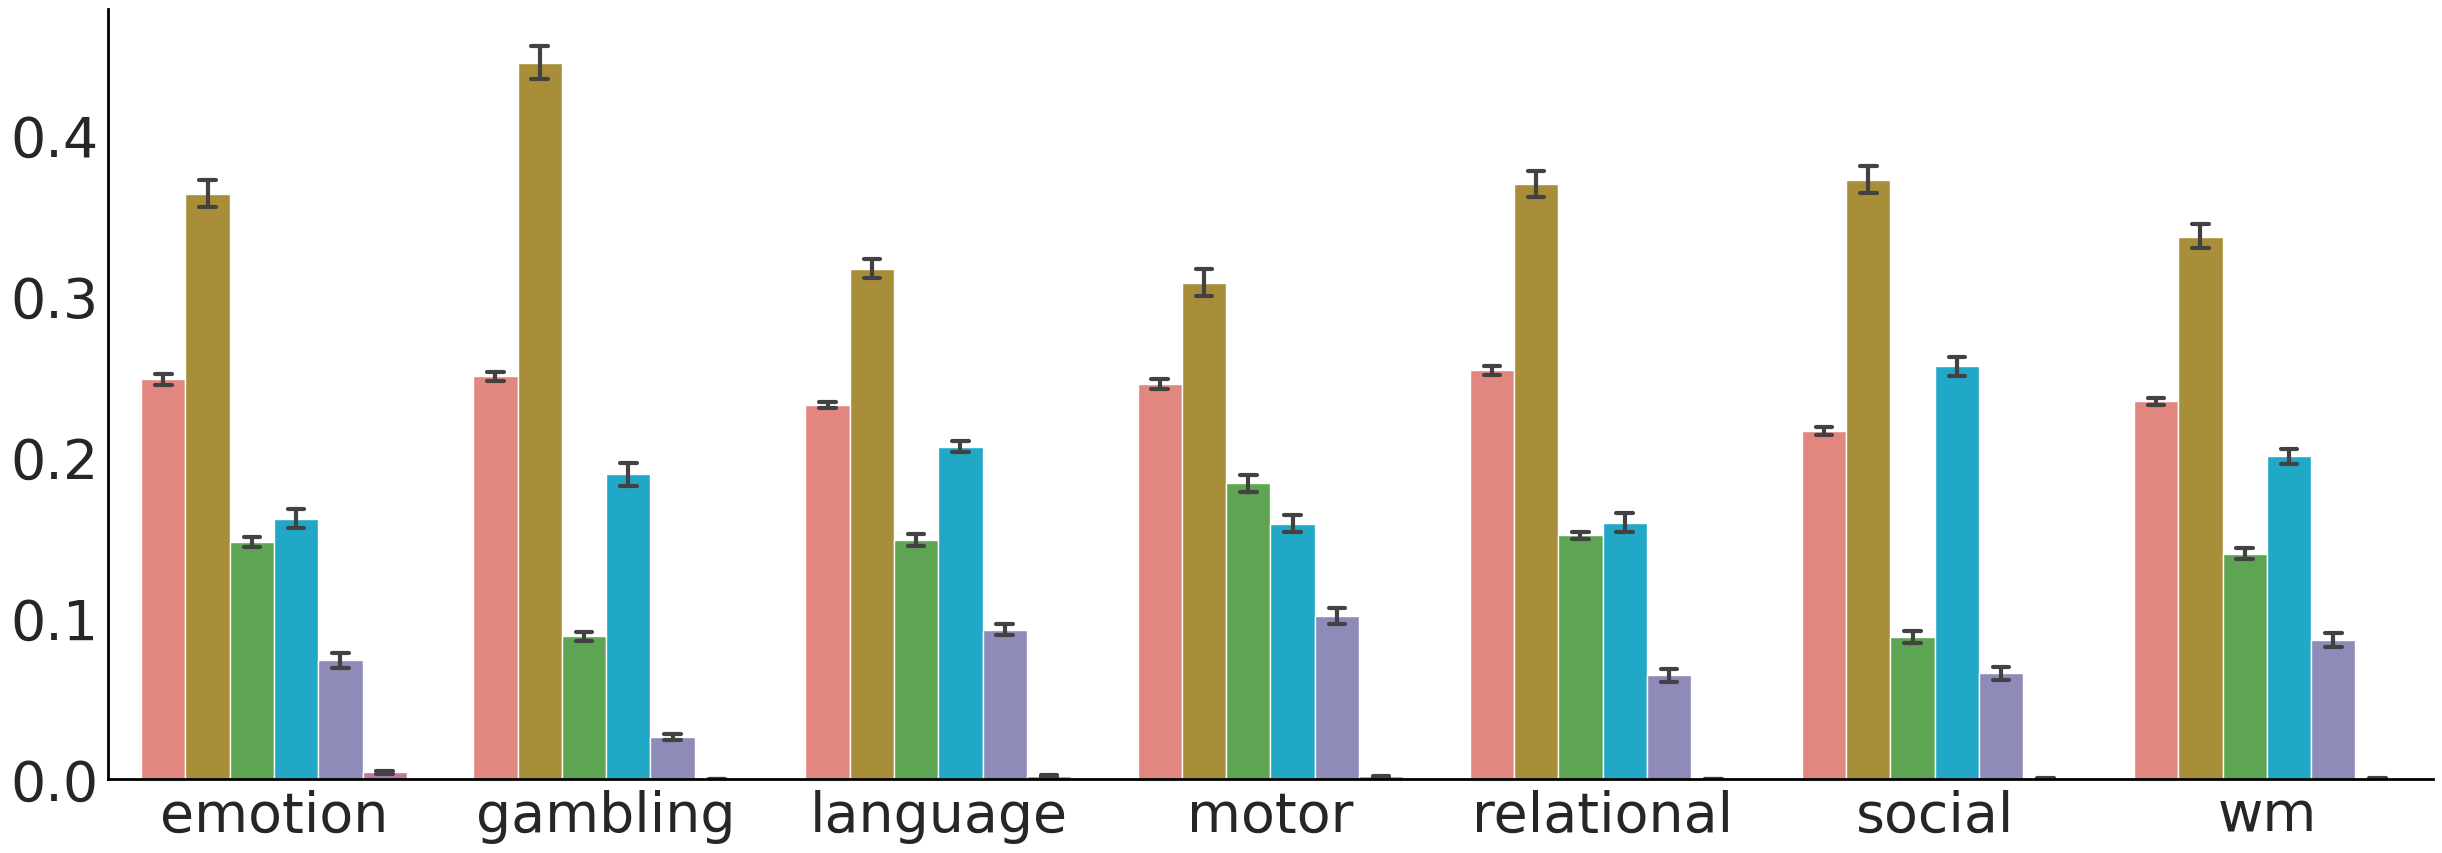

In [7]:
flatui = ["#F27970", "#BB9727","#54B345",'#05B9E2','#8983BF','#C76DA2'  ]
column = ['value']
df = pd.DataFrame(columns=column,data = np.array(all_std).reshape(-1))
df.insert(loc=1, column='task', value=np.repeat(range(0,7), 600*6))
df.insert(loc=2, column='lobe', value=[0,1,2,3,4,5]*600*7)
sns.set_style("whitegrid", {'axes.grid' : False})
six_regions_name = ['Frontal','Limbic','Temporal','Parietal','Occipital','Subcortical']
task_type = ['emotion','gambling','language','motor','relational','social','wm']
fig,ax = plt.subplots(figsize=(30,10))                
graph_value = df
for i in np.arange(0,len(graph_value['task'])):
    graph_value['task'][i] = task_type[graph_value['task'][i]%7]
for i in np.arange(0,len(graph_value['lobe'])):
    graph_value['lobe'][i] = six_regions_name[graph_value['lobe'][i]%6]    
ax = sns.barplot( x=graph_value["task"],y=graph_value["value"],hue=graph_value['lobe'],ci=95,errwidth=3,capsize=0.05,palette = sns.color_palette(flatui))
ax.get_legend().remove()
plt.ylabel('',fontsize=40)
plt.xlabel('',fontsize=30,weight='bold')
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
plt.savefig("/media/D/zephyr/vit_155_155/picture/hcp/scheafer/topkconn/{}_all_std_0.002-0.202.svg".format(percent), dpi=300,format="svg")

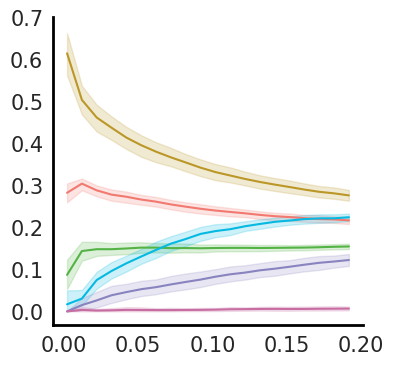

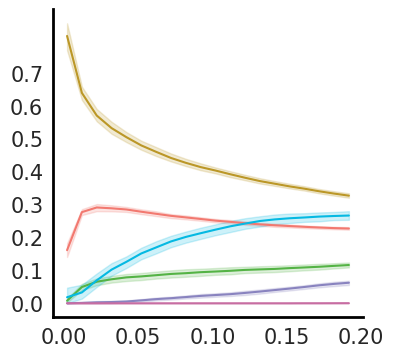

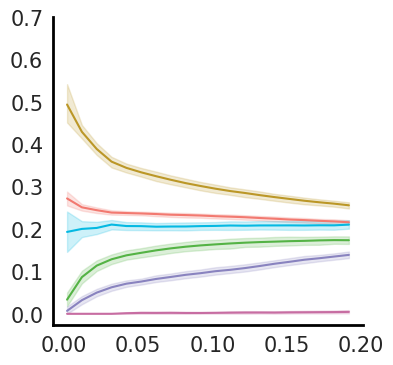

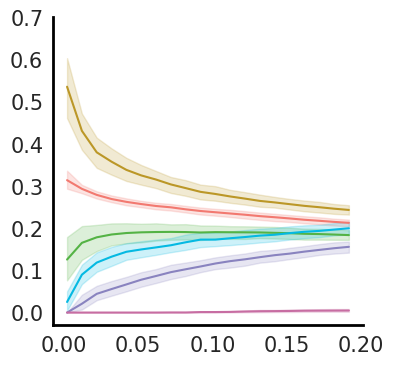

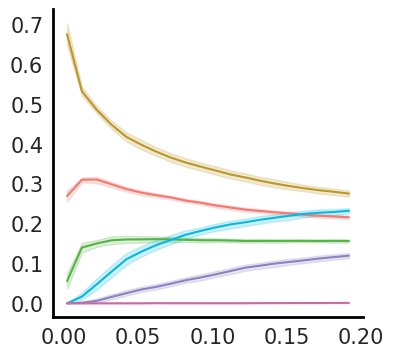

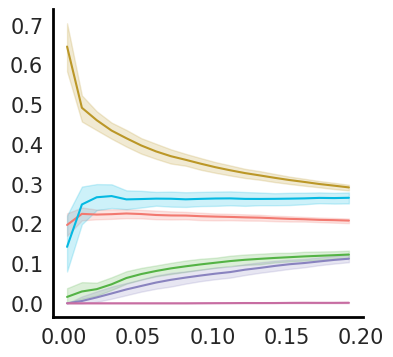

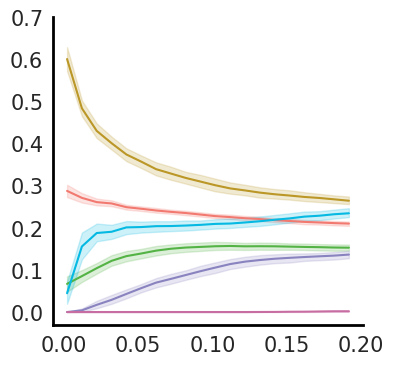

In [8]:
flatui = ["#F27970", "#BB9727","#54B345",'#05B9E2','#8983BF','#C76DA2'  ]
for task_now in range(7):
    column = ['value']
    df = pd.DataFrame(columns=column,data = np.array(all_std)[600*task_now:600*(task_now+1)].reshape(-1))
    df.insert(loc=1, column='conn_type', value=list(range(0,6))*30*20)
    df.insert(loc=1, column='tholhold', value=list(np.repeat(np.arange(0.002,0.202,0.01),6))*30)
    sns.set_style("whitegrid", {'axes.grid' : False})
    six_regions_name = ['gyri-sulci','sulci-sulci','gyri-gyri','sulci-sub','gyri-sub','sub-sub']
    fig,ax = plt.subplots(figsize=(4,4))                
    graph_value = df
    for i in np.arange(0,len(graph_value['conn_type'])):
        graph_value['conn_type'][i] = six_regions_name[graph_value['conn_type'][i]%6]    
    ax = sns.lineplot( x=graph_value["tholhold"],y=graph_value["value"],hue=graph_value['conn_type'],palette = sns.color_palette(flatui))
    ax.get_legend().remove()
    plt.ylabel('',fontsize=40)
    plt.xlabel('',fontsize=30,weight='bold')
    plt.yticks(np.arange(0,0.71,0.1),fontsize=15)
    plt.xticks(fontsize=15)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
    plt.savefig("/media/D/zephyr/vit_155_155/picture/hcp/scheafer/topkconn/{}_{}.svg".format(percent,CLS2IDX[task_now]), dpi=300,format="svg")